In [4]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = "https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY/export?format=xlsx"
Google_sheet = pd.ExcelFile(url)

In [2]:
#finding sheet name
Google_sheet.sheet_names

['amsterdam_weekdays',
 'amsterdam_weekends',
 'athens_weekdays',
 'athens_weekends',
 'berlin_weekends',
 'berlin_weekdays',
 'barcelona_weekdays',
 'barcelona_weekends',
 'budapest_weekdays',
 'budapest_weekends',
 'lisbon_weekdays',
 'lisbon_weekends',
 'london_weekdays',
 'london_weekends',
 'paris_weekdays',
 'paris_weekends',
 'rome_weekdays',
 'rome_weekends',
 'vienna_weekdays',
 'vienna_weekends']

In [3]:
#creating dataframe
dataframes = []

In [4]:
#dictonery to create city_country list
city_to_country = {
    'amsterdam': 'Netherlands',
    'athens': 'Greece',
    'berlin': 'Germany',
    'barcelona': 'Spain',
    'budapest': 'Hungary',
    'lisbon': 'Portugal',
    'london': 'United Kingdom',
    'paris': 'France',
    'rome': 'Italy',
    'vienna': 'Austria'
}

In [5]:
for sheet_name in Google_sheet.sheet_names:
    df = pd.read_excel(Google_sheet, sheet_name=sheet_name)

    if '_weekdays' in sheet_name:
        city = sheet_name.replace('_weekdays', '')
        day_type = 'Weekday'
    elif '_weekends' in sheet_name:
        city = sheet_name.replace('_weekends', '')
        day_type = 'Weekend'
    else:
        continue  
        
    df['City'] = city.capitalize()
    df['Weekday/Weekend'] = day_type
    df['Country'] = city_to_country.get(city.lower(), 'Unknown')

    dataframes.append(df)

In [6]:
data = pd.concat(dataframes, ignore_index=True)
data

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Weekday/Weekend,Country
0,0.0,194.033698,Private room,False,True,2.0,False,1.0,0.0,10.0,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Weekday,Netherlands
1,1.0,344.245776,Private room,False,True,4.0,False,0.0,0.0,8.0,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,Weekday,Netherlands
2,2.0,264.101422,Private room,False,True,2.0,False,0.0,1.0,9.0,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,Weekday,Netherlands
3,3.0,433.529398,Private room,False,True,4.0,False,0.0,1.0,9.0,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,Weekday,Netherlands
4,4.0,485.552926,Private room,False,True,2.0,True,0.0,0.0,10.0,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,Weekday,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794.0,715.938574,Entire home/apt,False,False,6.0,False,0.0,1.0,10.0,...,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,Vienna,Weekend,Austria
51703,1795.0,304.793960,Entire home/apt,False,False,2.0,False,0.0,0.0,8.0,...,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,Vienna,Weekend,Austria
51704,1796.0,637.168969,Entire home/apt,False,False,2.0,False,0.0,0.0,10.0,...,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,Vienna,Weekend,Austria
51705,1797.0,301.054157,Private room,False,True,2.0,False,0.0,0.0,10.0,...,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,Vienna,Weekend,Austria


In [7]:
if 'realSum' in data.columns:
    data.rename(columns={'realSum': 'Price'}, inplace=True)
data.drop(data.columns[0], axis=1, inplace=True, errors='ignore')

In [8]:
data.head()

,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Weekday/Weekend,Country
0,194.033698,Private room,False,True,2.0,False,1.0,0.0,10.0,93.0,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Weekday,Netherlands
1,344.245776,Private room,False,True,4.0,False,0.0,0.0,8.0,85.0,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,Weekday,Netherlands
2,264.101422,Private room,False,True,2.0,False,0.0,1.0,9.0,87.0,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,Weekday,Netherlands
3,433.529398,Private room,False,True,4.0,False,0.0,1.0,9.0,90.0,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,Weekday,Netherlands
4,485.552926,Private room,False,True,2.0,True,0.0,0.0,10.0,98.0,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,Weekday,Netherlands


In [9]:
data.describe()

,Price,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


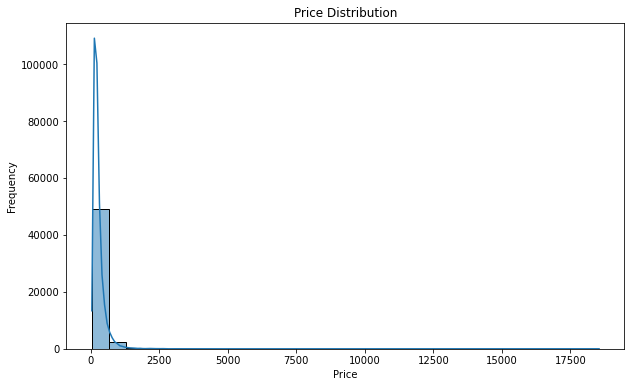

In [10]:
# Price distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

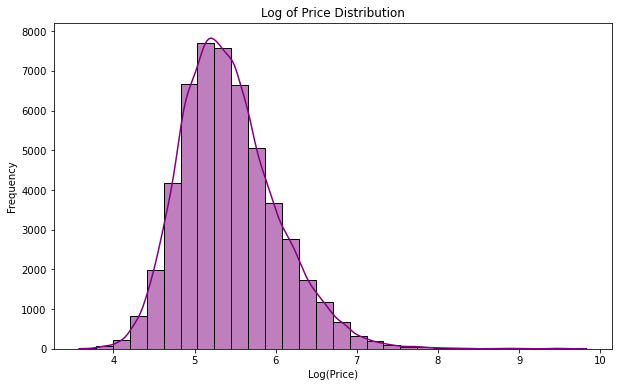

In [11]:
data['Log_Price'] = np.log1p(data['Price'])
plt.figure(figsize=(10, 6))
sns.histplot(data['Log_Price'], bins=30, kde=True, color='purple')
plt.title('Log of Price Distribution')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

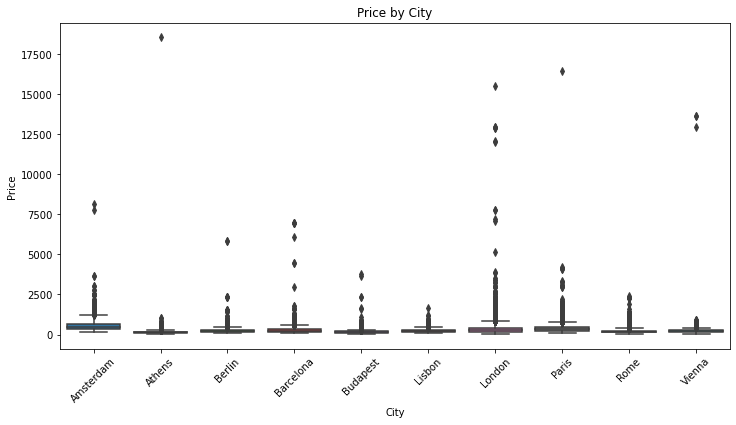

In [12]:
# Box plot of price by city
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Price', data=data)
plt.title('Price by City')
plt.xticks(rotation=45)
plt.show()

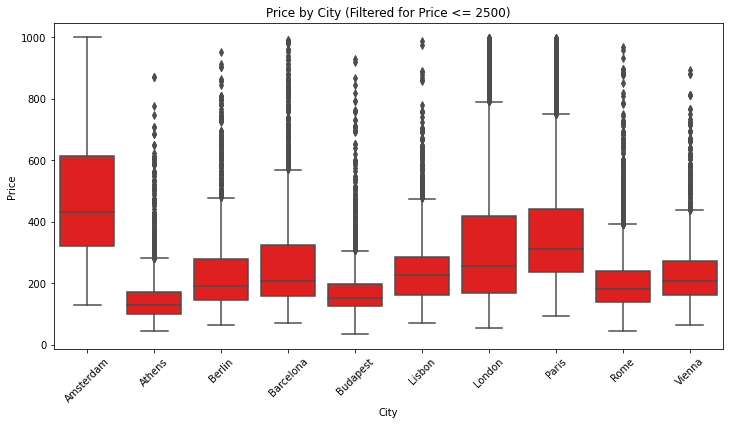

In [13]:
filtered_data = data[data['Price'] <= 1000]
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Price', data=filtered_data, color='red')
plt.title('Price by City (Filtered for Price <= 2500)')
plt.xticks(rotation=45)
plt.show()

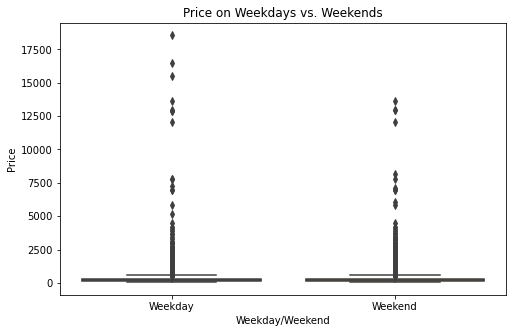

In [14]:
# Price comparison between weekdays and weekends
plt.figure(figsize=(8, 5))
sns.boxplot(x='Weekday/Weekend', y='Price', data=data)
plt.title('Price on Weekdays vs. Weekends')
plt.show()

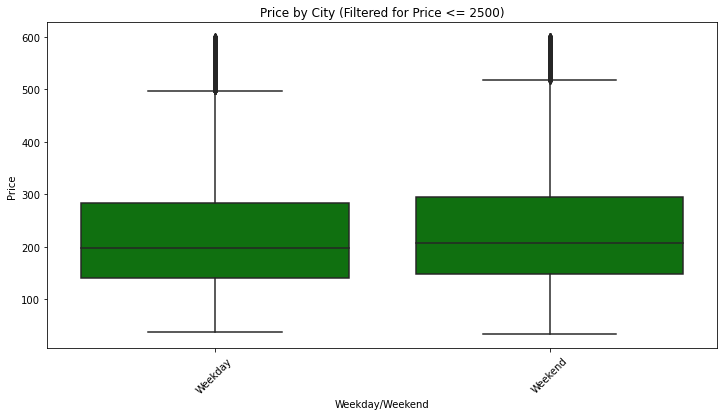

In [15]:
filtered_data = data[data['Price'] <= 600]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weekday/Weekend', y='Price', data=filtered_data, color='green')
plt.title('Price by City (Filtered for Price <= 2500)')
plt.xticks(rotation=45)
plt.show()

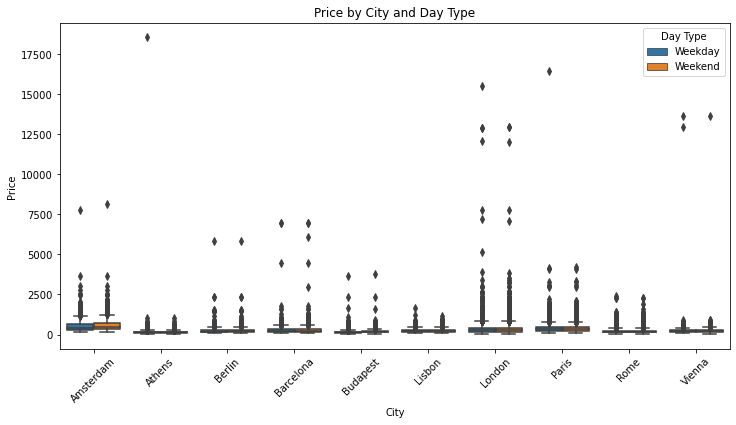

In [16]:
# Price by city and day type
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Price', hue='Weekday/Weekend', data=data)
plt.title('Price by City and Day Type')
plt.xticks(rotation=45)
plt.legend(title='Day Type')
plt.show()

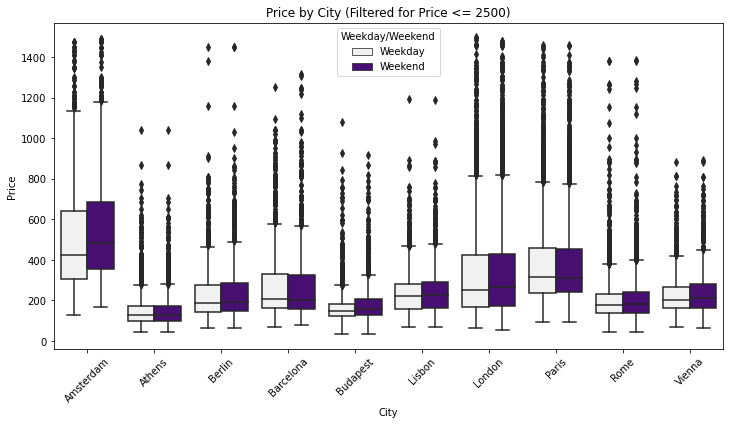

In [17]:
filtered_data = data[data['Price'] <= 1500]
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Price', hue='Weekday/Weekend', data=filtered_data, color='indigo')
plt.title('Price by City (Filtered for Price <= 2500)')
plt.xticks(rotation=45)
plt.show()

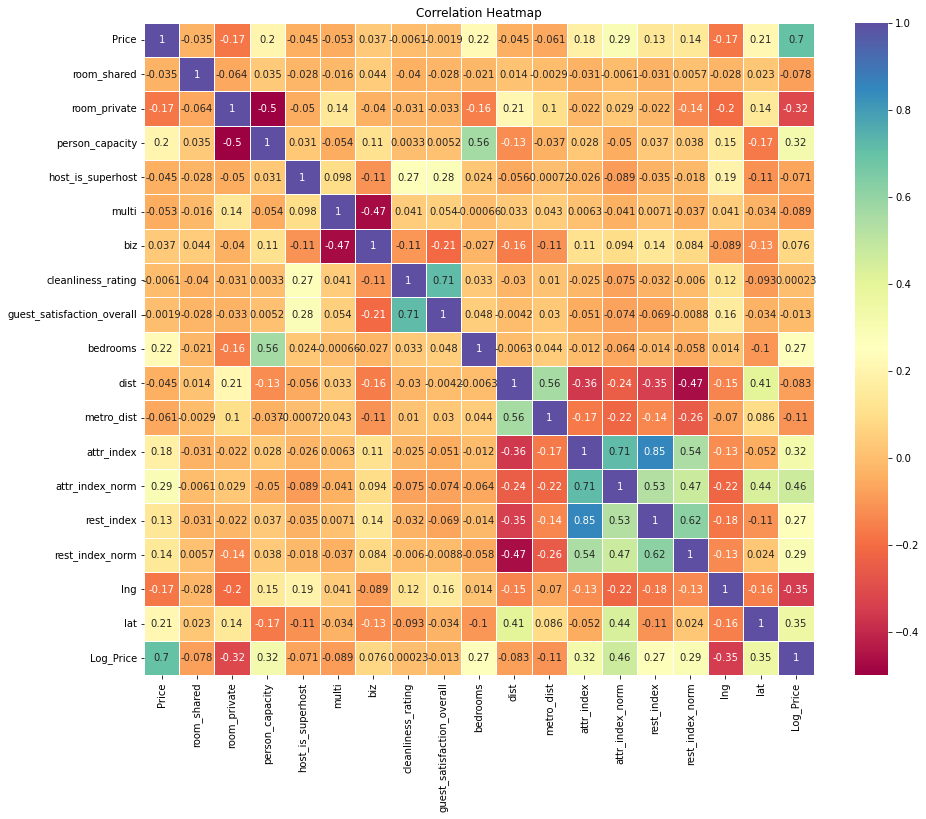

In [18]:
# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
weekly_discount = 0.20 
monthly_discount = 0.40  

data['Weekly_Price'] = data['Price'] * 7 * (1 - weekly_discount)
data['Monthly_Price'] = data['Price'] * 30 * (1 - monthly_discount)

city_rent_prices = {
    'Amsterdam': 1500,
    'Athens': 600,
    'Berlin': 1000,
    'Barcelona': 1200,
    'Budapest': 700,
    'Lisbon': 1000,
    'London': 2000,
    'Paris': 1800,
    'Rome': 900,
    'Vienna': 1000
}
data['Average_Monthly_Rent'] = data['City'].map(city_rent_prices)
data['Airbnb_vs_Rent'] = data['Monthly_Price'] - data['Average_Monthly_Rent']
data[['City', 'Price', 'Weekly_Price', 'Monthly_Price', 'Average_Monthly_Rent', 'Airbnb_vs_Rent']].head()

,City,Price,Weekly_Price,Monthly_Price,Average_Monthly_Rent,Airbnb_vs_Rent
0,Amsterdam,194.033698,1086.588709,3492.606566,1500,1992.606566
1,Amsterdam,344.245776,1927.776346,6196.423968,1500,4696.423968
2,Amsterdam,264.101422,1478.967966,4753.825604,1500,3253.825604
3,Amsterdam,433.529398,2427.764629,7803.529164,1500,6303.529164
4,Amsterdam,485.552926,2719.096384,8739.952663,1500,7239.952663


In [20]:
def categorize_host_listings(multi):
    if multi == 1:
        return 'One Listing'
    elif multi == 2:
        return 'Two Listings'
    elif multi == 4:
        return 'Four Listings'
    elif multi > 4:
        return 'More than Four Listings'
    else:
        return 'Unknown'  
    
data['Host_Listings_Category'] = data['multi'].apply(categorize_host_listings)
data[['multi', 'Host_Listings_Category']].head()

,multi,Host_Listings_Category
0,1.0,One Listing
1,0.0,Unknown
2,0.0,Unknown
3,0.0,Unknown
4,0.0,Unknown
